In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
from tqdm import tqdm

print(os.listdir())
import matplotlib.pyplot as plt

['social_graph_indicator.txt', '.DS_Store', 'social_A.txt', 'social_graph_labels.txt', 'social_to_adjacency.ipynb', 'social_node_labels.txt', 'large_twitch_edges.csv', 'social.txt', 'artist_edges.csv', '.ipynb_checkpoints', 'sampling_test.ipynb']


In [2]:
social_data = pd.read_csv("large_twitch_edges.csv")
print(social_data.shape)
np.savetxt(r'social_A.txt', social_data.values, fmt='%d', delimiter=",\t")

(6797557, 2)


In [3]:
G = nx.Graph()
for i in tqdm(range(social_data.shape[0])):
    G.add_edge(social_data.iloc[i, 0], social_data.iloc[i,1])
G = nx.convert_node_labels_to_integers(G)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6797557/6797557 [01:56<00:00, 58215.50it/s]


(6797557, 2)
168114
200
400000


  0%|                                                                                                                                                                                                                                                                                                                                            | 0/2000 [00:00<?, ?it/s]

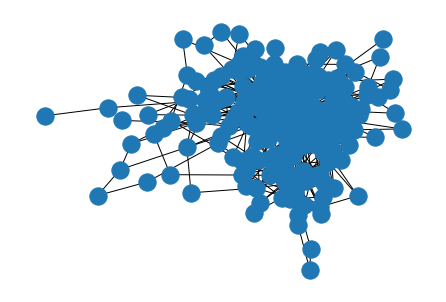

  7%|███████████████████████▉                                                                                                                                                                                                                                                                                                          | 149/2000 [00:07<01:32, 19.96it/s]

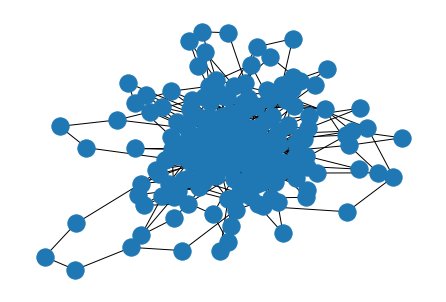

 15%|███████████████████████████████████████████████▉                                                                                                                                                                                                                                                                                  | 298/2000 [00:15<01:21, 20.85it/s]

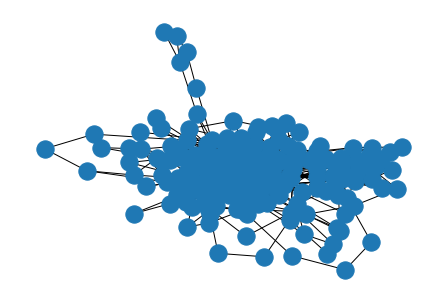

 22%|████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                                                                         | 450/2000 [00:23<01:23, 18.59it/s]

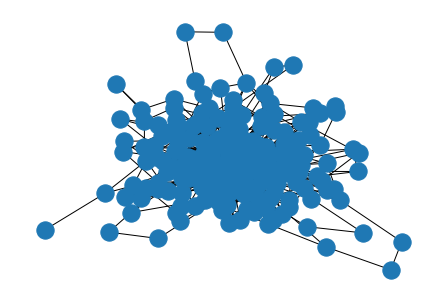

 30%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                                                 | 599/2000 [00:30<01:11, 19.69it/s]

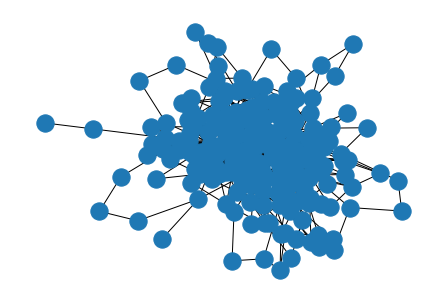

 37%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                         | 749/2000 [00:38<01:02, 20.09it/s]

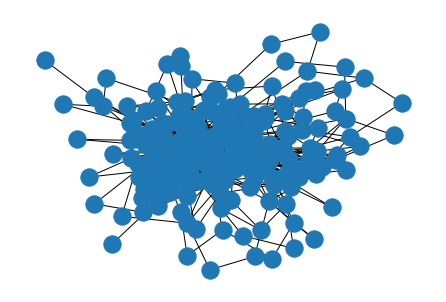

 45%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                 | 899/2000 [00:46<00:58, 18.95it/s]

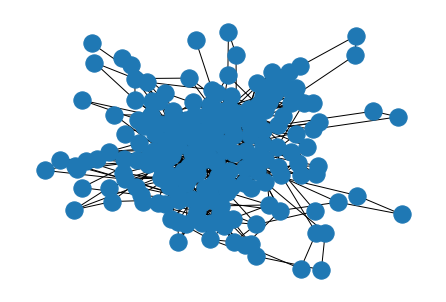

 52%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 1049/2000 [00:54<00:55, 17.15it/s]

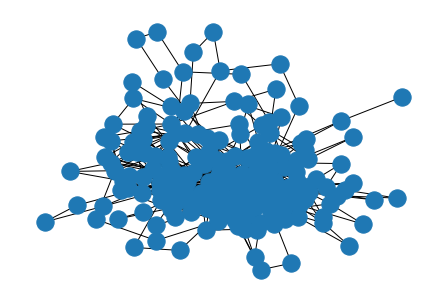

 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                | 1199/2000 [01:04<00:47, 16.87it/s]

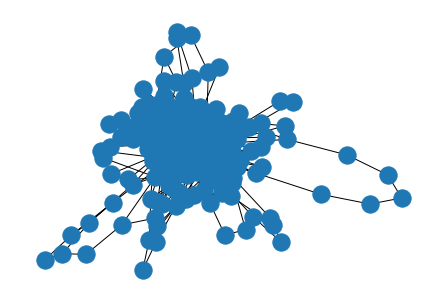

 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                        | 1350/2000 [01:13<00:34, 18.99it/s]

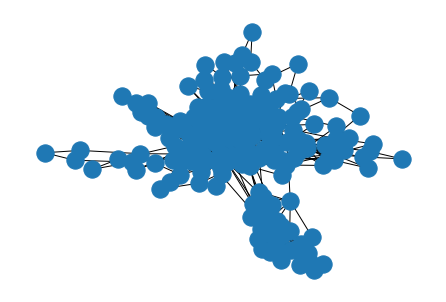

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 1498/2000 [01:21<00:25, 19.40it/s]

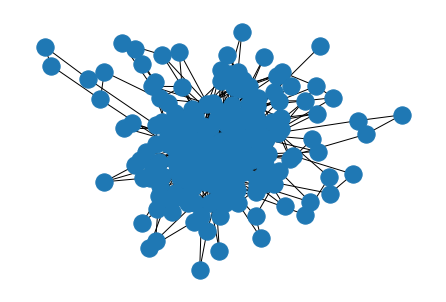

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 1649/2000 [01:29<00:18, 18.97it/s]

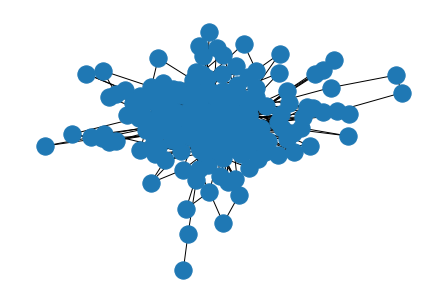

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 1800/2000 [01:37<00:10, 18.44it/s]

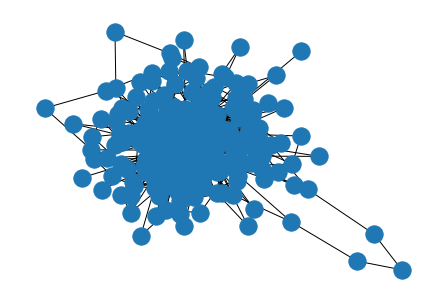

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1949/2000 [01:46<00:02, 18.44it/s]

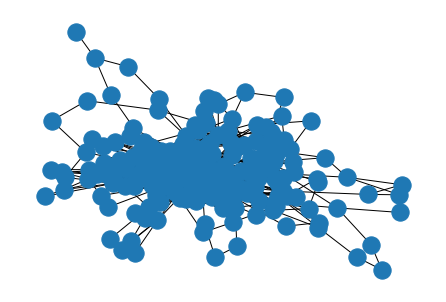

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:48<00:00, 18.37it/s]


(1535241, 2)
(400000,)
(400000,)
(400000,)


In [22]:
from littleballoffur import ForestFireSampler, MetropolisHastingsRandomWalkSampler, RandomWalkSampler
print(social_data.shape)
n_nodes = np.unique(social_data.values).shape[0]
print(n_nodes)
n_graphs = 2000

graph_ind_array = np.zeros(n_nodes)
n_per_graph = 200#int(n_nodes / n_graphs)

print(n_per_graph)

total_n = n_per_graph * n_graphs

print(total_n)
graph_ind_array = np.zeros(total_n)


#number_of_nodes = int(0.5*graph.number_of_nodes())


for i in tqdm(range(n_graphs)):
    
    offset_index = i * n_per_graph
    sampler = RandomWalkSampler(number_of_nodes = n_per_graph, seed = np.random.randint(1, 1e6))
    new_graph = sampler.sample(G)
    
    # print(len(list(new_graph.nodes())))
    
    new_graph = nx.convert_node_labels_to_integers(new_graph, first_label=offset_index)
    
    graph_ind_array[offset_index:(i+1) * n_per_graph] = i+1
    
    
    if i ==0:
        graph_adj = np.array(new_graph.edges())
    else:
        graph_adj = np.append(graph_adj, np.array(new_graph.edges()), axis = 0)
    
    if i % 150 == 0:
        nx.draw(new_graph)
        plt.show()

print(graph_adj.shape)
print(graph_ind_array.shape)
        
np.savetxt(r'social_A.txt', graph_adj, fmt='%d', delimiter=",\t")
np.savetxt(r'social_graph_indicator.txt',graph_ind_array, fmt="%d")

np.savetxt(r'social_node_labels.txt', np.arange(1, total_n+1), fmt = "%d")
print(np.arange(1, total_n+1).shape)

np.savetxt(r'social_graph_labels.txt', np.ones(total_n), fmt = "%d")
print(np.ones(total_n).shape)

In [5]:
# print(social_data.shape)
# n_nodes = np.unique(social_data.values).shape[0]
# print(n_nodes)
# n_graphs = 100

# graph_ind_array = np.zeros(n_nodes)
# n_per_graph = int(n_nodes / n_graphs)

# print(n_per_graph)

# G_ids = []

# for i in range(n_graphs):
    
#     G2 = nx.Graph()

#     for node in G.nodes():
        
#         neighbours = list(G.neighbors(node))


In [6]:


# # for i in range(n_graphs):
    
# #     graph_ind_array[i*n_per_graph : (i+1)*n_per_graph] = i+1
    
# #     if i == n_graphs - 1:
# #         graph_ind_array[(i+1)*n_per_graph:] = i+1

# np.savetxt(r'social_graph_indicator.txt',graph_ind_array, fmt="%d")
# print(graph_ind_array.shape)

In [7]:
# np.savetxt(r'social_node_labels.txt', np.arange(1, n_nodes+1), fmt = "%d")
# print(np.arange(1, n_nodes+1).shape)

In [8]:
# np.savetxt(r'social_graph_labels.txt', np.ones(n_nodes), fmt = "%d")
# print(np.ones(n_nodes).shape)

In [9]:
# adj = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_A.txt", delimiter = ",|\n")
# adj.shape

In [10]:
# g_ind = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_graph_indicator.txt", delimiter = ",|\n")
# g_ind.shape

In [11]:
# n_lab = pd.read_csv("/Users/alexdavies/Documents/Year_1/Project/GRAN_social/data/DD/DD_node_labels.txt", delimiter = ",|\n")
# n_lab.shape